In [114]:
# Import the required libraries and dependencies
import pandas as pd
import hvplot.pandas
import plotly.express as px
import os
from pathlib import Path
from dotenv import load_dotenv



In [16]:
# Using the read_csv function and Path module, create a DataFrame 
# by importing the sfo_neighborhoods_census_data.csv file from the Resources folder
sfo_data_df = pd.read_csv(
    Path("C:/Users/owner/Documents/git/UT/UTOR-VIRT-FIN-PT-05-2022-U-LOLC/06-PyViz/Unit 6 Homework/Starter_Code/Resources/sfo_neighborhoods_census_data.csv"), 
    )

# Review the first and last five rows of the DataFrame
display(sfo_data_df.head())
display(sfo_data_df.tail())

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
392,2016,Telegraph Hill,903.049771,384242,4390
393,2016,Twin Peaks,970.085470,384242,4390
394,2016,Van Ness/ Civic Center,552.602567,384242,4390
395,2016,Visitacion Valley,328.319007,384242,4390
396,2016,Westwood Park,631.195426,384242,4390


In [17]:
# Create a numerical aggregation that groups the data by the year and then averages the results.
housing_units_by_year = sfo_data_df.groupby("year").mean()

# Review the DataFrame
housing_units_by_year

,sale_price_sqr_foot,housing_units,gross_rent
year,,,
2010,369.344353,372560.0,1239.0
2011,341.903429,374507.0,1530.0
2012,399.389968,376454.0,2324.0
2013,483.600304,378401.0,2971.0
2014,556.277273,380348.0,3528.0
2015,632.540352,382295.0,3739.0
2016,697.643709,384242.0,4390.0


In [78]:
# Create a visual aggregation explore the housing units by year

housing_units_by_year.hvplot.bar(
    x="year", 
    y="housing_units", 
    rot=90
    
).opts(
    yformatter='%.0f', title = "Housing Units in San Francisco from 2010 to 2016"
)

:Bars   [year]   (housing_units)

In [49]:
 # Create a numerical aggregation by grouping the data by year and averaging the results
prices_square_foot_by_year = sfo_data_df.groupby("year").mean()

# Review the resulting DataFrame
prices_square_foot_by_year

,sale_price_sqr_foot,housing_units,gross_rent
year,,,
2010,369.344353,372560.0,1239.0
2011,341.903429,374507.0,1530.0
2012,399.389968,376454.0,2324.0
2013,483.600304,378401.0,2971.0
2014,556.277273,380348.0,3528.0
2015,632.540352,382295.0,3739.0
2016,697.643709,384242.0,4390.0


In [46]:
#Calculate the lowest gross rent for the dataframe
gross_rent_min = sfo_data_df.groupby("year")['gross_rent'].min()

# View the resulting Series
gross_rent_min

year
2010    1239
2011    1530
2012    2324
2013    2971
2014    3528
2015    3739
2016    4390
Name: gross_rent, dtype: int64

In [50]:
# Filter out the housing_units column, creating a new DataFrame 
# Keep only sale_price_sqr_foot and gross_rent averages per year
prices_square_foot_by_year = prices_square_foot_by_year.drop(columns=['housing_units'])

# Review the DataFrame
prices_square_foot_by_year



,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239.0
2011,341.903429,1530.0
2012,399.389968,2324.0
2013,483.600304,2971.0
2014,556.277273,3528.0
2015,632.540352,3739.0
2016,697.643709,4390.0


In [65]:
# Plot prices_square_foot_by_year. 
# Inclued labels for the x- and y-axes, and a title.

sale_sq_plot=prices_square_foot_by_year.hvplot(
    x="year", 
    y="sale_price_sqr_foot",
    label="Sale Price Per Square Foot"
)
sale_sq_plot

:Curve   [year]   (sale_price_sqr_foot)

In [66]:
gross_rent_plot=prices_square_foot_by_year.hvplot(
    x="year", 
    y="gross_rent",
    label="Avg. Gross Rent"
)
gross_rent_plot

:Curve   [year]   (gross_rent)

In [80]:
sale_sq_plot * gross_rent_plot

     

:Overlay
   .Curve.Sale_Price_Per_Square_Foot :Curve   [year]   (sale_price_sqr_foot)
   .Curve.Avg_full_stop_Gross_Rent   :Curve   [year]   (gross_rent)

In [98]:
# Group by year and neighborhood and then create a new dataframe of the mean values
prices_by_year_by_neighborhood = sfo_data_df.groupby(['year','neighborhood']).mean()

# Review the DataFrame
prices_by_year_by_neighborhood

sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                          
2010 Alamo Square                     291.182945       372560.0      1239.0
     Anza Vista                       267.932583       372560.0      1239.0
     Bayview                          170.098665       372560.0      1239.0
     Buena Vista Park                 347.394919       372560.0      1239.0
     Central Richmond                 319.027623       372560.0      1239.0
...                                          ...            ...         ...
2016 Telegraph Hill                   903.049771       384242.0      4390.0
     Twin Peaks                       970.085470       384242.0      4390.0
     Van Ness/ Civic Center           552.602567       384242.0      4390.0
     Visitacion Valley                328.319007       384242.0      4390.0
     Westwood Park                    631.195426       384242.0      4390.0

[397 rows x 3 columns]

In [99]:
# Filter out the housing_units
prices_by_year_by_neighborhood = prices_by_year_by_neighborhood.drop(columns=['housing_units'])


# Review the first and last five rows of the DataFrame
display(prices_by_year_by_neighborhood.head())
display(prices_by_year_by_neighborhood.tail())


sale_price_sqr_foot  gross_rent
year neighborhood                                     
2010 Alamo Square               291.182945      1239.0
     Anza Vista                 267.932583      1239.0
     Bayview                    170.098665      1239.0
     Buena Vista Park           347.394919      1239.0
     Central Richmond           319.027623      1239.0

sale_price_sqr_foot  gross_rent
year neighborhood                                           
2016 Telegraph Hill                   903.049771      4390.0
     Twin Peaks                       970.085470      4390.0
     Van Ness/ Civic Center           552.602567      4390.0
     Visitacion Valley                328.319007      4390.0
     Westwood Park                    631.195426      4390.0

In [103]:
# Use hvplot to create an interactive line plot of the average price per square foot
# The plot should have a dropdown selector for the neighborhood
prices_by_year_by_neighborhood.hvplot(
    groupby="neighborhood", 
    rot=90, 
    size=(35, 7)
   
)


:DynamicMap   [neighborhood]
   :NdOverlay   [Variable]
      :Curve   [year]   (value)

In [105]:
 # Load neighborhoods coordinates data
neighborhood_locations_df = pd.read_csv(
    Path("C:/Users/owner/Documents/git/UT/UTOR-VIRT-FIN-PT-05-2022-U-LOLC/06-PyViz/Unit 6 Homework/Starter_Code/Resources/neighborhoods_coordinates.csv"), index_col="Neighborhood" 
    )

# Review the DataFrame
neighborhood_locations_df

,Lat,Lon
Neighborhood,,
Alamo Square,37.791012,-122.402100
Anza Vista,37.779598,-122.443451
Bayview,37.734670,-122.401060
Bayview Heights,37.728740,-122.410980
Bernal Heights,37.728630,-122.443050
...,...,...
West Portal,37.740260,-122.463880
Western Addition,37.792980,-122.435790
Westwood Highlands,37.734700,-122.456854


In [106]:
# Calculate the mean values for each neighborhood
all_neighborhood_info_df = sfo_data_df.groupby("neighborhood").mean()

# Review the resulting DataFrame
all_neighborhood_info_df

,year,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,,
Alamo Square,2013.000000,366.020712,378401.00,2817.285714
Anza Vista,2013.333333,373.382198,379050.00,3031.833333
Bayview,2012.000000,204.588623,376454.00,2318.400000
Bayview Heights,2015.000000,590.792839,382295.00,3739.000000
Bernal Heights,2013.500000,576.746488,379374.50,3080.333333
...,...,...,...,...
West Portal,2012.250000,498.488485,376940.75,2515.500000
Western Addition,2012.500000,307.562201,377427.50,2555.166667
Westwood Highlands,2012.000000,533.703935,376454.00,2250.500000


In [107]:
# Using the Pandas `concat` function, join the 
# neighborhood_locations_df and the all_neighborhood_info_df DataFrame
# The axis of the concatenation is "columns".
# The concat function will automatially combine columns with
# identical information, while keeping the additional columns.
all_neighborhoods_df = pd.concat(
    [neighborhood_locations_df, all_neighborhood_info_df], 
    axis="columns",
    sort=False
)
# Review the resulting DataFrame
display(all_neighborhoods_df.head())
display(all_neighborhoods_df.tail())

,Lat,Lon,year,sale_price_sqr_foot,housing_units,gross_rent
Alamo Square,37.791012,-122.402100,2013.000000,366.020712,378401.0,2817.285714
Anza Vista,37.779598,-122.443451,2013.333333,373.382198,379050.0,3031.833333
Bayview,37.734670,-122.401060,2012.000000,204.588623,376454.0,2318.400000
Bayview Heights,37.728740,-122.410980,2015.000000,590.792839,382295.0,3739.000000
Bernal Heights,37.728630,-122.443050,NaN,NaN,NaN,NaN


,Lat,Lon,year,sale_price_sqr_foot,housing_units,gross_rent
Yerba Buena,37.79298,-122.39636,2012.5,576.709848,377427.5,2555.166667
Bernal Heights,NaN,NaN,2013.5,576.746488,379374.5,3080.333333
Downtown,NaN,NaN,2013.0,391.434378,378401.0,2817.285714
Ingleside,NaN,NaN,2012.5,367.895144,377427.5,2509.000000
Outer Richmond,NaN,NaN,2013.0,473.900773,378401.0,2817.285714


In [108]:
# Call the dropna function to remove any neighborhoods that do not have data
all_neighborhoods_df = all_neighborhoods_df.reset_index().dropna()

# Rename the "index" column as "Neighborhood" for use in the Visualization
all_neighborhoods_df = all_neighborhoods_df.rename(columns={"index": "Neighborhood"})

# Review the resulting DataFrame
display(all_neighborhoods_df.head())
display(all_neighborhoods_df.tail())

,Neighborhood,Lat,Lon,year,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,2013.000000,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,2013.333333,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,2012.000000,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,2015.000000,590.792839,382295.0,3739.000000
5,Buena Vista Park,37.768160,-122.439330,2012.833333,452.680591,378076.5,2698.833333


,Neighborhood,Lat,Lon,year,sale_price_sqr_foot,housing_units,gross_rent
68,West Portal,37.74026,-122.463880,2012.25,498.488485,376940.75,2515.500000
69,Western Addition,37.79298,-122.435790,2012.50,307.562201,377427.50,2555.166667
70,Westwood Highlands,37.73470,-122.456854,2012.00,533.703935,376454.00,2250.500000
71,Westwood Park,37.73415,-122.457000,2015.00,687.087575,382295.00,3959.000000
72,Yerba Buena,37.79298,-122.396360,2012.50,576.709848,377427.50,2555.166667


In [137]:
#Find the maximum price per square feet of all neighbourhoods thoughout timeframe
sq_ft_max = all_neighborhoods_df.groupby('sale_price_sqr_foot').max()
sq_ft_max

,Neighborhood,Lat,Lon,year,housing_units,gross_rent
sale_price_sqr_foot,,,,,,
170.292549,Silver Terrace,37.73467,-122.40106,2014.00,380348.00,3528.000000
170.624920,Hunters Point,37.72551,-122.37178,2012.50,377427.50,2489.000000
204.588623,Bayview,37.73467,-122.40106,2012.00,376454.00,2318.400000
242.370952,Outer Mission,37.72280,-122.43869,2013.50,379374.50,2995.750000
301.466180,Visitacion Valley,37.72874,-122.41098,2014.50,381321.50,3657.000000
...,...,...,...,...,...,...
687.087575,Westwood Park,37.73415,-122.45700,2015.00,382295.00,3959.000000
689.555817,Pacific Heights,37.79298,-122.43579,2013.00,378401.00,2817.285714
779.810842,Miraloma Park,37.73415,-122.45700,2011.75,375967.25,2155.250000


In [131]:
#Find the maximum gross rent of all neighbourhoods thoughout timeframe
gross_rent_max = all_neighborhoods_df.groupby('gross_rent').max()
gross_rent_max

,Neighborhood,Lat,Lon,year,sale_price_sqr_foot,housing_units
gross_rent,,,,,,
1781.500000,Forest Knolls,37.757060,-122.45509,2011.000000,321.840837,374507.00
2016.000000,Diamond Heights,37.728630,-122.44305,2011.500000,434.991739,375480.50
2099.000000,South Beach,37.783230,-122.40065,2011.666667,650.124479,375805.00
2155.250000,Miraloma Park,37.734150,-122.45700,2011.750000,779.810842,375967.25
2250.500000,Westwood Highlands,37.753310,-122.44703,2012.000000,533.703935,376454.00
2318.400000,Portola,37.734670,-122.40106,2012.000000,327.113925,376454.00
2434.000000,Oceanview,37.719930,-122.46595,2012.333333,330.097385,377103.00
2472.000000,Financial District South,37.791010,-122.40210,2012.400000,587.539067,377232.80
2489.000000,Hunters Point,37.725510,-122.37178,2012.500000,170.624920,377427.50


In [116]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

# Set token using Plotly Express set function
px.set_mapbox_access_token(map_box_api)

In [113]:
# Create a plot to analyze neighborhood info
#attempted below, but we haven't used GEOVIEWS so unsure if correct, and got the error below...used MAPBOX instead

#neigh_plot = all_neighborhoods_df.hvplot.points(
#   geo="True",
#    size="sale_price_sqr_foot",
#    color="gross_rent",
#    title="SF Neighbourhoods by gross rent and SQ. FT ",
#    frame_width=700,
#    frame_height=500,
#)
# YOUR CODE HERE

ImportError: Geographic projection support requires GeoViews and cartopy.

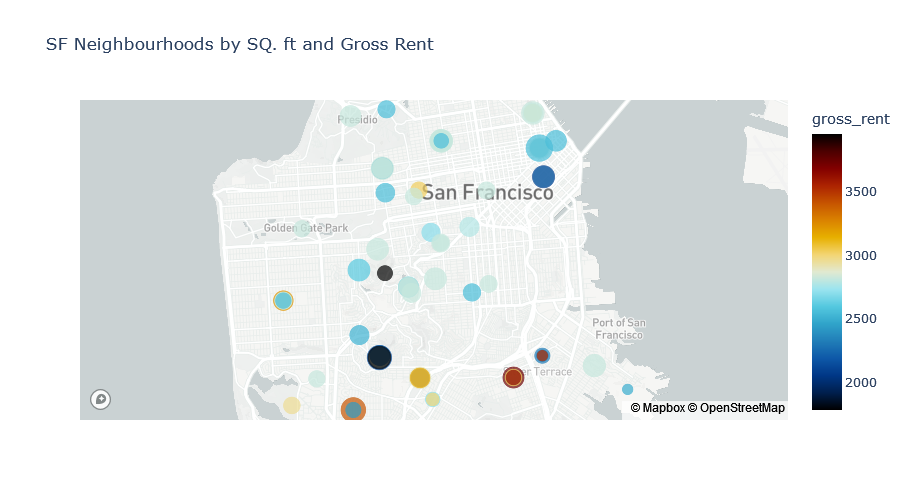

In [135]:
# Create plots showing price per square foot, and Gross rent in the San Francisco area
neighborhood_plot = px.scatter_mapbox(
    all_neighborhoods_df,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    color_continuous_scale=px.colors.cyclical.IceFire,
    title="SF Neighbourhoods by SQ. ft and Gross Rent",
    zoom=11,
    width=700,
    height=500,
)
neighborhood_plot.show()

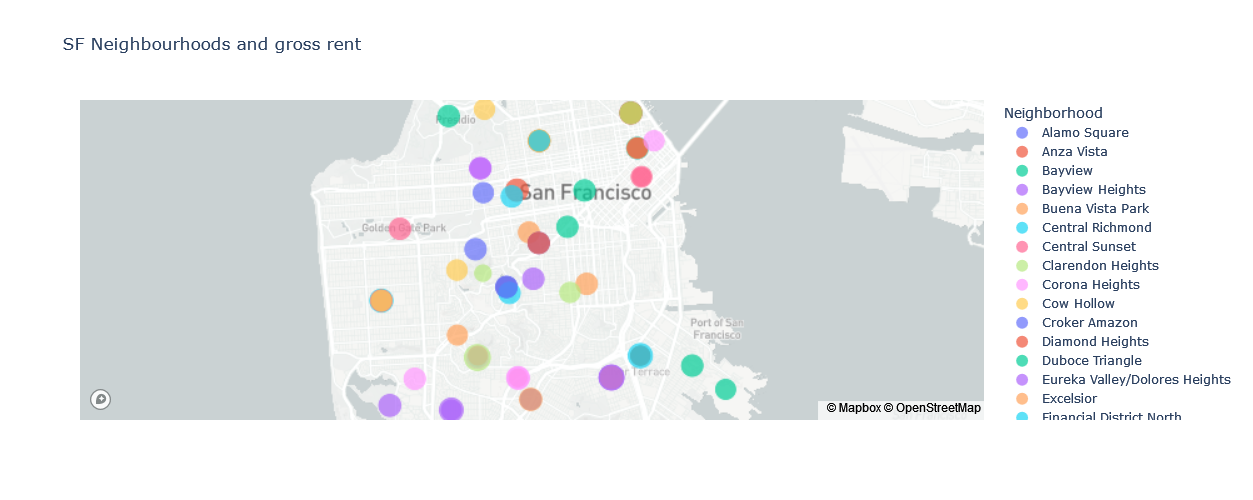

In [138]:
# Create plots showing Neighbourhood and Gross rent in the San Francisco area
neighborhood_plot2 = px.scatter_mapbox(
    all_neighborhoods_df,
    lat="Lat",
    lon="Lon",
    size="gross_rent",
    color="Neighborhood",
    color_continuous_scale=px.colors.cyclical.IceFire,
    title="SF Neighbourhoods and gross rent",
    zoom=11,
    width=700,
    height=500,
)
neighborhood_plot2.show()